In [171]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreadsbooks/books.csv


In [172]:
import pandas as pd
import numpy as np
import warnings  
warnings.filterwarnings('ignore')

In [173]:
df= pd.read_csv('/kaggle/input/goodreadsbooks/books.csv',
                engine='python',
               on_bad_lines='skip')

In [174]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [175]:
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11114,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11115,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11116,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11117,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11118,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11119 non-null  int64  
 1   title               11119 non-null  object 
 2   authors             11119 non-null  object 
 3   average_rating      11119 non-null  float64
 4   isbn                11119 non-null  object 
 5   isbn13              11119 non-null  int64  
 6   language_code       11119 non-null  object 
 7     num_pages         11119 non-null  int64  
 8   ratings_count       11119 non-null  int64  
 9   text_reviews_count  11119 non-null  int64  
 10  publication_date    11119 non-null  object 
 11  publisher           11119 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [177]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11119.000000,11119.000000,1.111900e+04,11119.000000,1.111900e+04,11119.000000
mean,21308.966184,3.934135,9.759873e+12,336.439788,1.794832e+04,542.167371
std,13093.071002,0.350384,4.430554e+11,241.177969,1.125190e+05,2577.069549
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,47.000000
75%,32103.500000,4.135000,9.780873e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [178]:
df=df.drop(columns='bookID',axis=1)

In [179]:
df.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [180]:
df.duplicated().sum()

0

In [181]:
df.columns.to_list()

['title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

In [182]:
df['authors'].value_counts()

authors
P.G. Wodehouse                                            40
Stephen King                                              40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Legs McNeil/Gillian McCain                                 1
Adam Woog                                                  1
Mikal Gilmore                                              1
Thich Nhat Hanh/Arnold Kotler/Dalai Lama XIV               1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: count, Length: 6635, dtype: int64

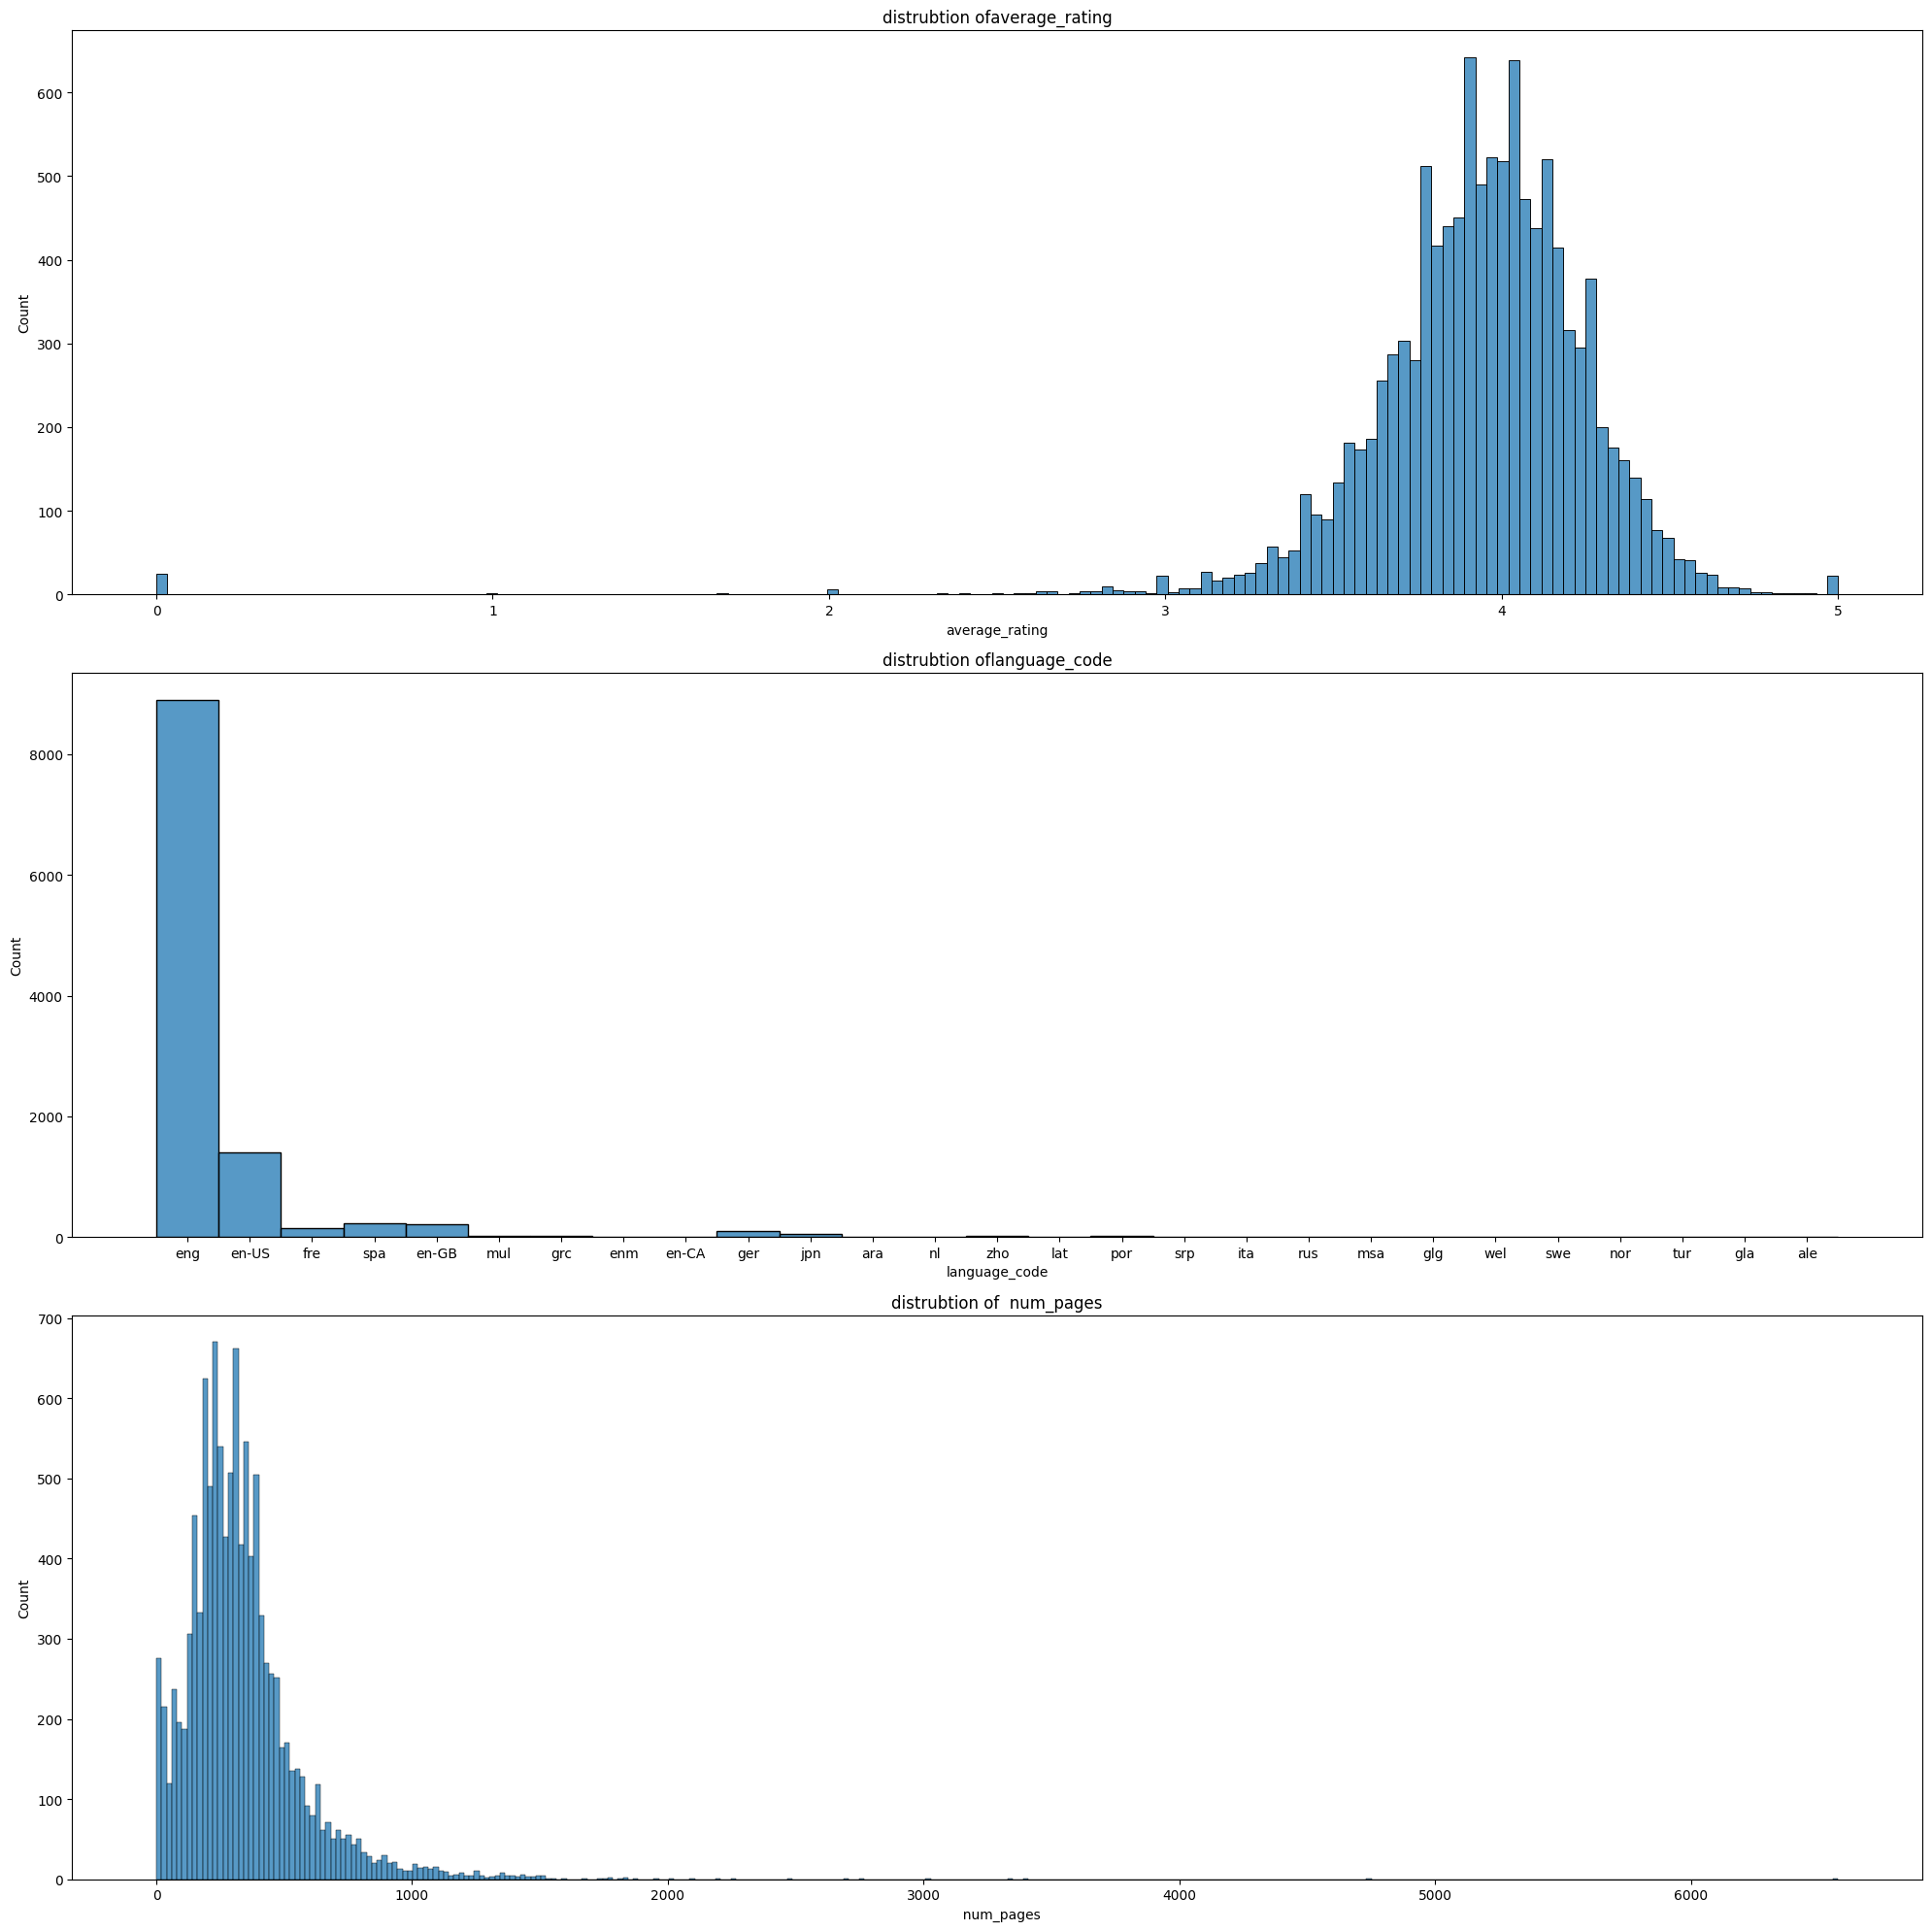

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs=plt.subplots(3,1,figsize=(20,20))
columns=['average_rating','language_code','  num_pages']
for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axs[i])
    axs[i].set_title(f'distrubtion of{col}')

plt.tight_layout()
plt.show()

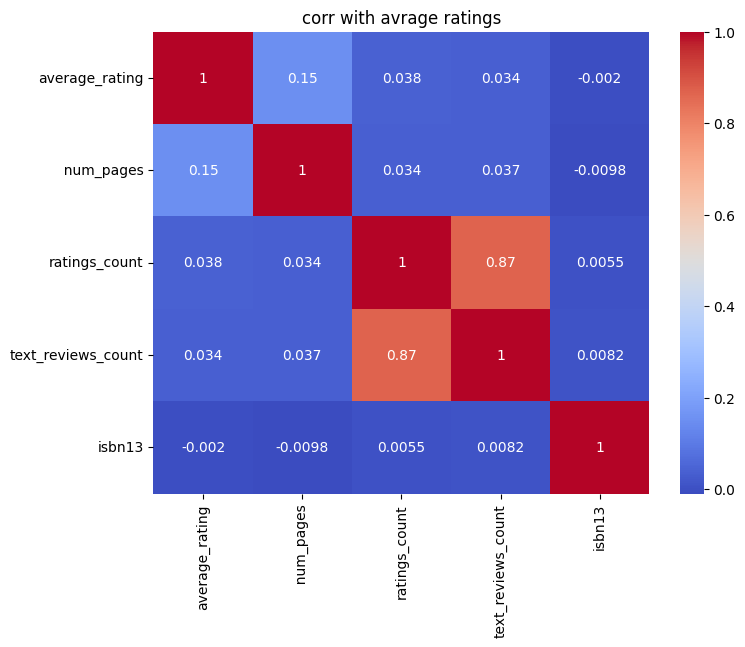

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['average_rating','  num_pages','ratings_count','text_reviews_count','isbn13']

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("corr with avrage ratings")
plt.show()


In [185]:
df=df.drop(columns=['ratings_count','text_reviews_count','isbn','isbn13'],axis=1)

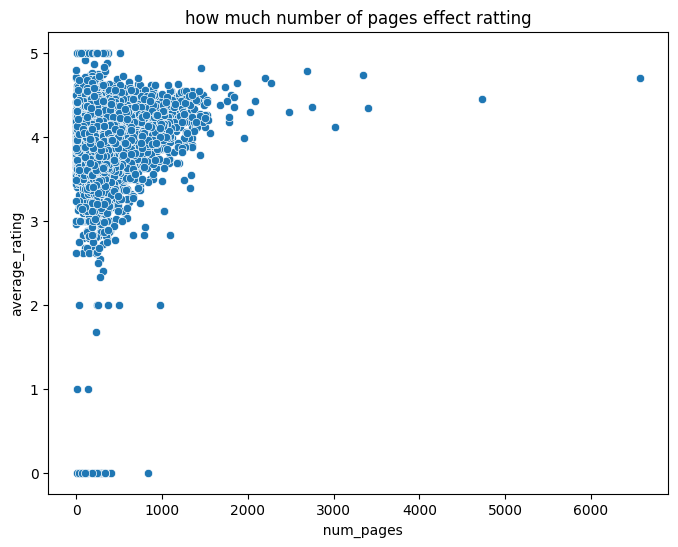

In [186]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='  num_pages', y='average_rating')
plt.title("how much number of pages effect ratting")
 
plt.show()


In [187]:
df['year'] = pd.to_datetime(df['publication_date'], errors='coerce').dt.year
df = df.drop('publication_date', axis=1)
df.head()

,title,authors,average_rating,language_code,num_pages,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,Scholastic Inc.,2006.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,Scholastic Inc.,2004.0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,Scholastic,2003.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,Scholastic Inc.,2004.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,Scholastic,2004.0


In [188]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

In [189]:
df_languages = pd.get_dummies(df['language_code'], prefix='', prefix_sep='')
df_languages = df_languages.astype(int)  

df = pd.concat([df.drop('language_code', axis=1), df_languages], axis=1)


In [190]:
df.head()

,title,authors,average_rating,num_pages,publisher,year,ale,ara,en-CA,en-GB,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,Scholastic Inc.,2006.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,Scholastic Inc.,2004.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,Scholastic,2003.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,Scholastic Inc.,2004.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,Scholastic,2004.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


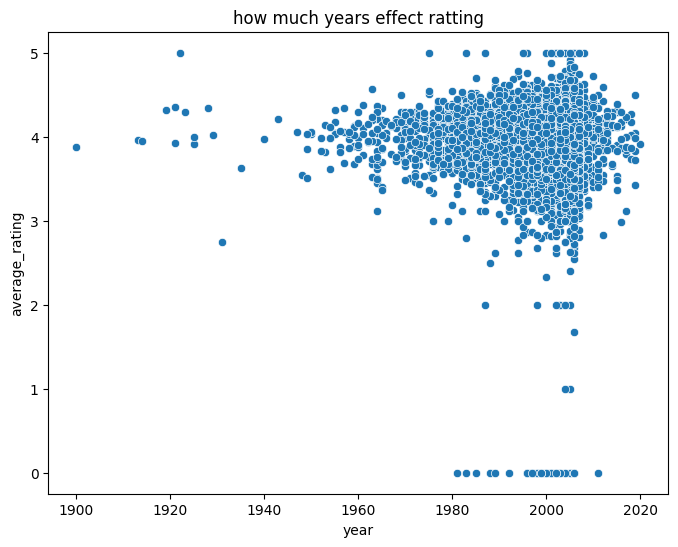

In [191]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='year', y='average_rating')
plt.title("how much years effect ratting")
 
plt.show()


In [193]:
numeric_df = df.select_dtypes(include=["int64", "float64"])


categorical_cols = ["title","authors", "publisher"]

categorical_df = df[["authors", "publisher"]]

target = df["average_rating"]



In [197]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=categorical_df)

categorical_encoded = encoder.fit_transform(categorical_df, target)


In [198]:
final_df = pd.concat([numeric_df, categorical_encoded], axis=1)


In [199]:
final_df.head()

,average_rating,num_pages,year,ale,ara,en-CA,en-GB,en-US,eng,enm,...,por,rus,spa,srp,swe,tur,wel,zho,authors,publisher
0,4.57,652,2006.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.055634,3.975643
1,4.49,870,2004.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.055634,3.975643
2,4.42,352,2003.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.101640,3.966844
3,4.56,435,2004.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.055634,3.975643
4,4.78,2690,2004.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.055634,3.966844


In [200]:
df.to_csv("has_cat.csv", index=False)  


In [201]:
final_df.to_csv("all_numeric.csv", index=False)  